In [3]:
import pandas as pd
df2= pd.read_csv("data2/환율.csv")
df2

df2['국가명'] = df2['국가명'].str.replace(pat=r'\'', repl=r'', regex=True)
df2['국가명'] 

country_name=[]
for i in df2['국가명']:
    a = i.split('(')
    country_name.append(a[0])
df2['국가명'] =country_name  

df1= pd.read_csv("data2/country_2022.csv")
df3= pd.read_csv("data2/GDP.csv")
df4= pd.read_csv("data2/금리.csv")


In [4]:
merged_df = pd.merge(df1,df2,on='국가명')
merged_df
print(merged_df)
merged_df2 = pd.merge(df3,df4,on='국가명')
merged_dff = pd.merge(merged_df2,merged_df,on='국가명')
merged_dff
#merged_dff.to_csv('merged_data.csv',header=True,index=False)

         국가명         무역수지        환율
0        베트남   34,238,963  23159.78
1         미국   27,980,983      1.00
2         홍콩   25,773,581      7.77
3         인도    9,972,967     73.92
4       싱가포르    9,857,627      1.34
..       ...          ...       ...
115      이라크   -8,333,092   1450.00
116     쿠웨이트  -12,000,388      0.30
117      카타르  -16,040,638      3.64
118       일본  -24,105,517    109.75
119  사우디아라비아  -36,775,118      3.75

[120 rows x 3 columns]


,국가명,국내총생산,1인당 총생산,대출금리,무역수지,환율
0,가나,7.549000e+10,2410.0,-,"171,956",5.81
1,가이아나,4.300000e+09,54680.0,8.88,"26,684",208.50
2,감비아,2.000000e+09,7870.0,19.5,"-1,219",51.48
3,과테말라,7.710000e+10,42890.0,12.19,"191,401",7.73
4,그레나다,1.000000e+09,91860.0,6.55,"2,744",2.70
...,...,...,...,...,...,...
73,페루,2.040000e+11,60830.0,10.98,"-2,069,271",3.88
74,폴란드,5.960000e+11,15700.0,-,"6,767,425",3.86
75,피지,4.545000e+09,5070.0,5.94,"274,704",2.07
76,필리핀,3.940000e+11,35720.0,-,"7,128,466",49.26


In [5]:
data= pd.read_csv("merged_data.csv")
data

,국가명,국내총생산,1인당 총생산,대출금리,무역수지,환율
0,가나,7.549000e+10,2410.0,-,"171,956",5.81
1,가이아나,4.300000e+09,54680.0,8.88,"26,684",208.50
2,감비아,2.000000e+09,7870.0,19.5,"-1,219",51.48
3,과테말라,7.710000e+10,42890.0,12.19,"191,401",7.73
4,그레나다,1.000000e+09,91860.0,6.55,"2,744",2.70
...,...,...,...,...,...,...
73,페루,2.040000e+11,60830.0,10.98,"-2,069,271",3.88
74,폴란드,5.960000e+11,15700.0,-,"6,767,425",3.86
75,피지,4.545000e+09,5070.0,5.94,"274,704",2.07
76,필리핀,3.940000e+11,35720.0,-,"7,128,466",49.26


In [6]:
out= data[data['대출금리'] =='-'].index
out
data =data.drop(out)
data = data.dropna()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import QuantileTransformer

# 데이터 준비
data_f = data[['국내총생산', '1인당 총생산', '대출금리', '무역수지', '환율']]
data_f

data_f_copy = data_f.copy()
data_f_copy['무역수지'] = data_f_copy['무역수지'].str.replace(',', '').astype(float)
data_f = data_f_copy
data_f

,국내총생산,1인당 총생산,대출금리,무역수지,환율
1,4.300000e+09,54680.0,8.88,26684.0,208.50
2,2.000000e+09,7870.0,19.5,-1219.0,51.48
3,7.710000e+10,42890.0,12.19,191401.0,7.73
4,1.000000e+09,91860.0,6.55,2744.0,2.70
5,1.100000e+10,42110.0,6.86,-6970.0,14.78
...,...,...,...,...,...
70,5.290000e+10,123730.0,6.94,576983.0,1.00
71,3.596000e+10,62950.0,12.51,42171.0,6774.16
73,2.040000e+11,60830.0,10.98,-2069271.0,3.88
75,4.545000e+09,5070.0,5.94,274704.0,2.07


In [8]:
from sklearn.cluster import KMeans # model 
from sklearn.datasets import load_iris # dataset 
import matplotlib.pyplot as plt # 시각화 
from sklearn.preprocessing import StandardScaler
#표준화
scaler = StandardScaler()
scale_f = scaler.fit_transform(data_f) 

size = range(1, 11) # k값 범위
inertia = [] # 응집도 (중심점과 포인트 간 거리 제곱합)
for k in size : 
    obj = KMeans(n_clusters = k) 
    model = obj.fit(scale_f)
    inertia.append(model.inertia_) 

print(inertia)

D:\Users\yujin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[330.0, 251.14209544125717, 186.666578281412, 126.55815949857075, 87.96970595806147, 65.62834320221572, 50.383662939316736, 37.24600542542413, 30.68946034136124, 25.792685433286426]


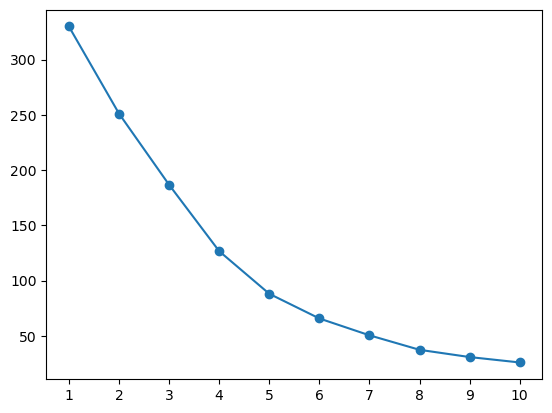

In [9]:
# 3. best cluster 찾기 
plt.plot(size, inertia, '-o')
plt.xticks(size)
plt.show()

In [10]:
# 클러스터링
kmeans = KMeans(n_clusters=7, random_state=10)
clusters = kmeans.fit(scale_f)
data['cluster']= clusters.labels_
data['cluster'].value_counts()

1    32
3    20
5     6
6     3
0     3
2     1
4     1
Name: cluster, dtype: int64

In [11]:
data_1 = data[data['cluster']==1]
data_2 = data[data['cluster']==3]
data_3 =data[data['cluster']==5]

#data_1.to_csv("cluster1.csv")
data_2.to_csv("cluster2.csv")
data_3.to_csv("cluster3.csv")

In [16]:
print(data_1)
print('*'*100)
print(data_2)
print('*'*100)
print(data_3)

         국가명         국내총생산   1인당 총생산   대출금리         무역수지      환율  cluster
1       가이아나  4.300000e+09   54680.0   8.88       26,684  208.50        1
4       그레나다  1.000000e+09   91860.0   6.55        2,744    2.70        1
5       나미비아  1.100000e+10   42110.0   6.86       -6,970   14.78        1
6   남아프리카공화국  3.020000e+11    5090.0   7.04   -2,624,803   14.78        1
7       노르웨이  3.620000e+11   67330.0   2.27     -989,545    8.59        1
11      루마니아  2.450000e+11  127570.0   5.61     -262,370    4.16        1
13     말레이시아  3.280000e+11  113990.0   3.44   -3,775,582    4.14        1
14       멕시코  1.080000e+12   84210.0   4.89    4,076,840   20.27        1
16      모리셔스  1.090000e+10      80.0   6.87       37,168   41.69        1
18     몬테네그로  5.490000e+09   87280.0   5.76     -317,190    0.85        1
19       몰도바  1.124100e+10  101830.0    7.4       -4,008   17.68        1
21     바베이도스  4.400000e+09  151630.0   8.05        6,281    2.00        1
22       바하마  1.130000e+10  292210.0  